In [1]:
from pandas import read_csv
import numpy as np

In [2]:
# Don't pay attention to this
# This is to keep kernel from dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
df = read_csv('AirPassengers.csv',usecols = [1])

In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [6]:
train_size = int(values.shape[0] * 0.67)
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [8]:
def create_dataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [9]:
look_back = 12
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)

In [10]:
# Input Data format in RNN Model
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(SimpleRNN(4,input_shape = (look_back,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.fit(trainX,trainY,epochs = 20,batch_size = 1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
84/84 [==============================] - 2s 21ms/step - loss: 0.0472
Epoch 2/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0227
Epoch 3/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0174
Epoch 4/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0160
Epoch 5/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0150
Epoch 6/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0139
Epoch 7/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0133
Epoch 8/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0115
Epoch 9/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0113
Epoch 10/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0106
Epoch 11/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0102
Epoch 12

In [13]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

trainTrue = scaler.inverse_transform([trainY]).ravel()
testTrue = scaler.inverse_transform([testY]).ravel()

testPredict.shape,testTrue.shape

((36,), (36,))

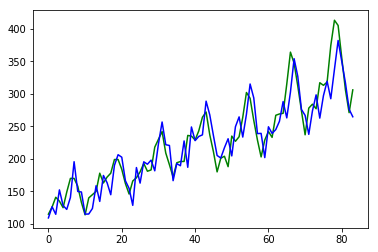

In [15]:
import matplotlib.pyplot as plt
plt.plot(trainTrue , c = 'g')
plt.plot(trainPredict , c = 'b')
plt.show()

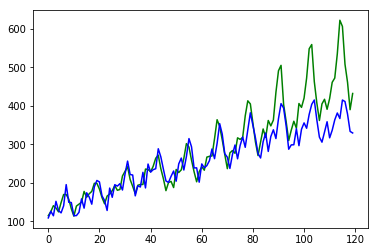

In [18]:
combinedPredict = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue , c = 'g')
plt.plot(combinedPredict , c = 'b')
plt.show()